In [1]:
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt

In [2]:
# 클래스
class_dict = {0: 'General trash', 1: 'Paper', 2: 'Paper pack', 3: 'Metal', 4: 'Glass', 5: 'Plastic', 6: 'Styrofoam', 7: 'Plastic bag', 8: 'Battery', 9: 'Clothing'}
# 클래스 별 색깔 (무지개색)
color_dict = {0:(0,0,255), 1:(0,50,255), 2:(0,255,255), 3:(0,255,100), 4:(0,255,0), 5:(100,255,0), 6:(255,0,0), 7:(255,5,0), 8:(255,0,100), 9:(255,255,255)}

In [4]:
def get_test_annotations(csv_file : pd.DataFrame, image_num : int) -> list:
    '''
    annotation을 가져오는 함수
    '''
    anns = csv_file.PredictionString[image_num].split(" ")
    anns = list(filter(None, anns))
    n = 6
    anns = [anns[i * n : (i + 1) * n] for i in range((len(anns) + n - 1) // n )]
    return anns

def read_image(dataset_path : str, file_path : str):
    '''
    지정한 path에 있는 image를 반환하는 함수
    '''
    image = cv2.imread(dataset_path + file_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def plot_test_bbox(image, anns : list, img_size : tuple, label : int) -> None:
    '''
    image에 지정한 label에 대한 bbox를 그리고 plot하는 함수
    '''
    category_name = class_dict[label]
    text_size, _ = cv2.getTextSize(category_name, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    text_w, text_h = text_size # text 크기
    
    for ann in anns:
        (lb, score, x_min, y_min, x_max, y_max) = map(float, ann)
        if int(lb) == label:
            # text box 그리기
            if int(y_min) - text_h < 1:
                cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_min) + text_w, int(y_min) + 15 + text_h), color_dict[label], -1)
                image = cv2.putText(image, category_name, (int(x_min), int(y_min) + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
            else:
                cv2.rectangle(image, (int(x_min), int(y_min) - 15 - text_h), (int(x_min) + text_w, int(y_min)), color_dict[label], -1)
                image = cv2.putText(image, category_name, (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
            image = cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color_dict[label], 3)

    fig, axes = plt.subplots(1, 1, figsize=(12, 12))
    axes.imshow(image)    

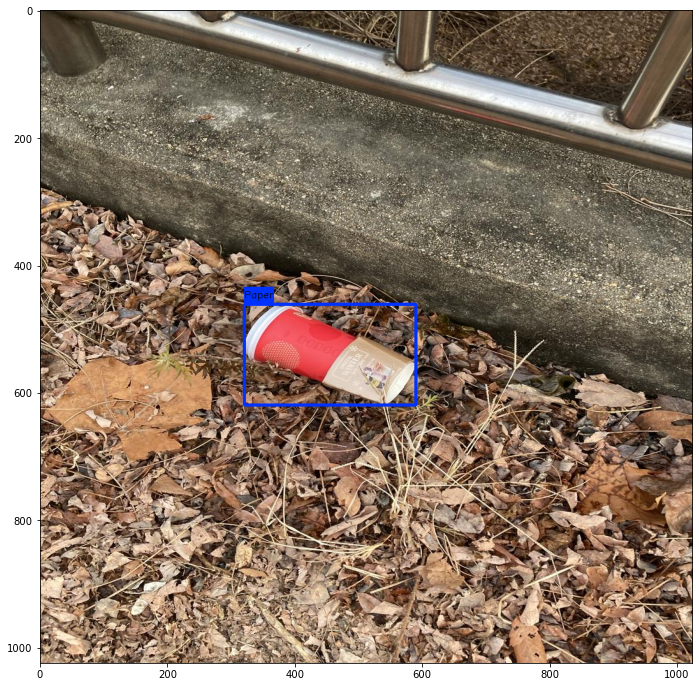

In [69]:
work_dir = './submission' # csv 파일 저장 경로
dataset_path = './' # dataset 경로
label = 1 # 원하는 클래스 선택

# csv파일 불러오기
data_frame = pd.read_csv(os.path.join(work_dir, 'deformable_detr_twostage_refine_r50_16x2_50e.csv'))

# image number random sampling
image_num = random.randint(0, len(data_frame) - 1)
# image file path
file_path = data_frame.image_id[image_num]

anns = get_test_annotations(data_frame, image_num)
image = read_image(dataset_path, file_path)
plot_test_bbox(image, anns, img_size, label)